# National Health and Nutrition Examination Survey

### 2015 - 2016 Data Documentation, Codebook and Frequencies

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import pandas as pd
import missingno as msno

In [2]:
metademo = {
    "SEQN": "Respondent sequence number",
    "RIAGENDR": "Gender",
    "RIDAGEYR": "Age in years"
}

metacbc = {
    'LBXWBCSI':('White blood cell count','10³ cells/uL'),
    'LBXLYPCT':('Lymphocyte percent','%'),
    'LBXMOPCT':('Monocyte percent','%'),
    'LBXNEPCT':('Segmented neutrophils percent','%'),
    'LBXEOPCT':('Eosinophils percent','%'),
    'LBXBAPCT':('Basophils percent','%'),
    'LBDLYMNO':('Lymphocyte number','10³ cells/uL'),
    'LBDMONO':('Monocyte number','10³ cells/uL'),
    'LBDNENO':('Segmented neutrophils number','10³ cells/uL'),
    'LBDEONO':('Eosinophils number','10³ cells/uL'),
    'LBDBANO':('Basophils number','10³ cells/uL'),
    'LBXRBCSI':('Red blood cell count','10⁶ cells/uL'),
    'LBXHGB':('Hemoglobin','g/dL'),
    'LBXHCT':('Hematocrit','%'),
    'LBXMCVSI':('Mean cell volume','fL'),
    'LBXMCHSI':('Mean cell hemoglobin','pg'),
    'LBXMC':('Mean cell hemoglobin concentration','g/dL'),
    'LBXRDW':('Red cell distribution width','%'),
    'LBXPLTSI':('Platelet count','10³ cells/uL'),
    'LBXMPSI':('Mean platelet volume','fL')
}

metabio = {
    "LBXSAL":("Albumin","g/dL"),
    "LBDSALSI":("Albumin","g/L"),
    "LBXSATSI":("Alanine aminotransferase (ALT)" ,"U/L"),
    "LBXSASSI":("Asparate aminotransferase (AST)", "U/L"),
    "LBXSAPSI":("Alkaline phosphotase", "U/L"),
    "LBXSBU":("Blood urea nitrogen", "mg/dL"),
    "LBXSCA":("Total calcium", "mg/dL"),
    "LBDSCASI":("Total calcium", "mmol/L"),
    "LBDSBUSI":("Blood urea nitrogen","mmol/L"),
    "LBXSCH":("Cholesterol", "mg/dL"),
    "LBDSCHSI":("Cholesterol", "mmol/L"),
    "LBXSC3SI":("Bicarbonate", "mmol/L"),
    "LBXSCR":("Creatinine", "mg/dL"),
    "LBDSCRSI":("Creatinine", "µmol/L"),
    "LBXSGTSI":("Gamma glutamyl transferase", "U/L)"),
    "LBXSGL":("Glucose, serum", "mg/dL"),
    "LBDSGLSI":("Glucose, serum", "mmol/L"),
    "LBXSIR":("Iron, refigerated", "ug/dL"),
    "LBDSIRSI":("Iron, refigerated", "umol/L"),
    "LBXSLDSI":("Lactate dehydrogenase LDH", "U/L"),
    "LBXSPH": ("Phosphorus", "mg/dL"),
    "LBDSPHSI":("Phosphorus", "mmol/L"),
    "LBXSTB": ("Total bilirubin", "mg/dL"),
    "LBDSTBSI": ("Bilirubin, total", "umol/L"),
    "LBXSTP": ("Total protein", "g/dL"),
    "LBDSTPSI": ("Total protein", "g/L"),
    "LBXSTR": ("Triglycerides", "mg/dL"),
    "LBDSTRSI": ("Triglycerides", "mmol/L"),
    "LBXSUA": ("Uric acid", "mg/dL"),
    "LBDSUASI": ("Uric acid", "umol/L"),
    "LBXSNASI": ("Sodium", "mmol/L"),
    "LBXSKSI": ("Potassium", "mmol/L"),
    "LBXSCLSI": ("Chloride", "mmol/L"),
    "LBXSOSSI": ("Osmolality", "mmol/Kg"),
    "LBXSGB": ("Globulin", "g/dL"),
    "LBDSGBSI": ("Globulin", "g/L")
}

---

# Complete Blood Count with 5-Part Differential (CBC)
* Category: Hematology.
* Range: 2015-2016
* Link: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2015/DataFiles/CBC_I.htm

Based on the Beckman Coulter methodology of counting and sizing (Beckman Coulter DxH).

Prefixes and suffixes explained:

* LBX- = Lab sample
* -SI = [...] Count/Volume
* -PCT = [...] Percent
* -NO = [...] Number

In [3]:
cbc = pd.read_sas('CBC_I.xpt')
cbc.describe()

SEQN     LBXWBCSI     LBXLYPCT     LBXMOPCT     LBXNEPCT  \
count   9165.000000  8117.000000  8116.000000  8116.000000  8116.000000   
mean   88730.322422     7.431366    34.150000     8.159426    53.961040   
std     2877.327265     2.582057    10.660106     2.176541    11.372769   
min    83732.000000     1.400000     3.700000     1.400000     3.600000   
25%    86236.000000     5.900000    26.900000     6.700000    47.100000   
50%    88741.000000     7.100000    32.900000     7.900000    55.100000   
75%    91218.000000     8.600000    40.100000     9.300000    61.700000   
max    93702.000000   117.200000    94.500000    29.300000    93.200000   

           LBXEOPCT     LBXBAPCT     LBDLYMNO      LBDMONO      LBDNENO  ...  \
count  8.116000e+03  8116.000000  8116.000000  8116.000000  8116.000000  ...   
mean   3.079115e+00     0.775086     2.505545     0.591412     4.062691  ...   
std    2.447456e+00     0.320882     1.689660     0.204446     1.693412  ...   
min    5.397605e-79     0.100000     0.200000     0.100000     0.300000  ...   
25%    1.500000e+00     0.600000     1.800000     0.500000     2.900000  ...   
50%    2.400000e+00     0.700000     2.300000     0.600000     3.800000  ...   
75%    3.800000e+00     1.000000     2.900000     0.700000     4.900000  ...   
max    3.220000e+01     4.000000   110.800000     2.600000    19.400000  ...   

            LBDBANO     LBXRBCSI       LBXHGB       LBXHCT     LBXMCVSI  \
count  8.116000e+03  8117.000000  8117.000000  8117.000000  8117.000000   
mean   5.325283e-02     4.745144    13.634188    40.942417    86.522779   
std    5.147740e-02     0.468835     1.488904     4.176923     6.489500   
min    5.397605e-79     2.520000     6.200000    21.800000    50.800000   
25%    5.397605e-79     4.440000    12.700000    38.100000    82.700000   
50%    1.000000e-01     4.720000    13.600000    40.700000    87.100000   
75%    1.000000e-01     5.040000    14.700000    43.800000    90.800000   
max    3.000000e-01     7.900000    19.200000    59.100000   115.600000   

          LBXMCHSI        LBXMC       LBXRDW     LBXPLTSI      LBXMPSI  
count  8117.000000  8147.000000  8117.000000  8117.000000  8117.000000  
mean     28.802119    33.273094    13.728705   254.578785     8.192633  
std       2.492381     0.947132     1.263585    67.500960     0.945158  
min      13.800000    27.100000    11.500000    14.000000     5.600000  
25%      27.500000    32.700000    13.000000   210.000000     7.500000  
50%      29.100000    33.300000    13.400000   248.000000     8.100000  
75%      30.500000    33.900000    14.100000   292.000000     8.800000  
max      38.500000    36.600000    26.400000   777.000000    15.100000  

[8 rows x 21 columns]

<Axes: >

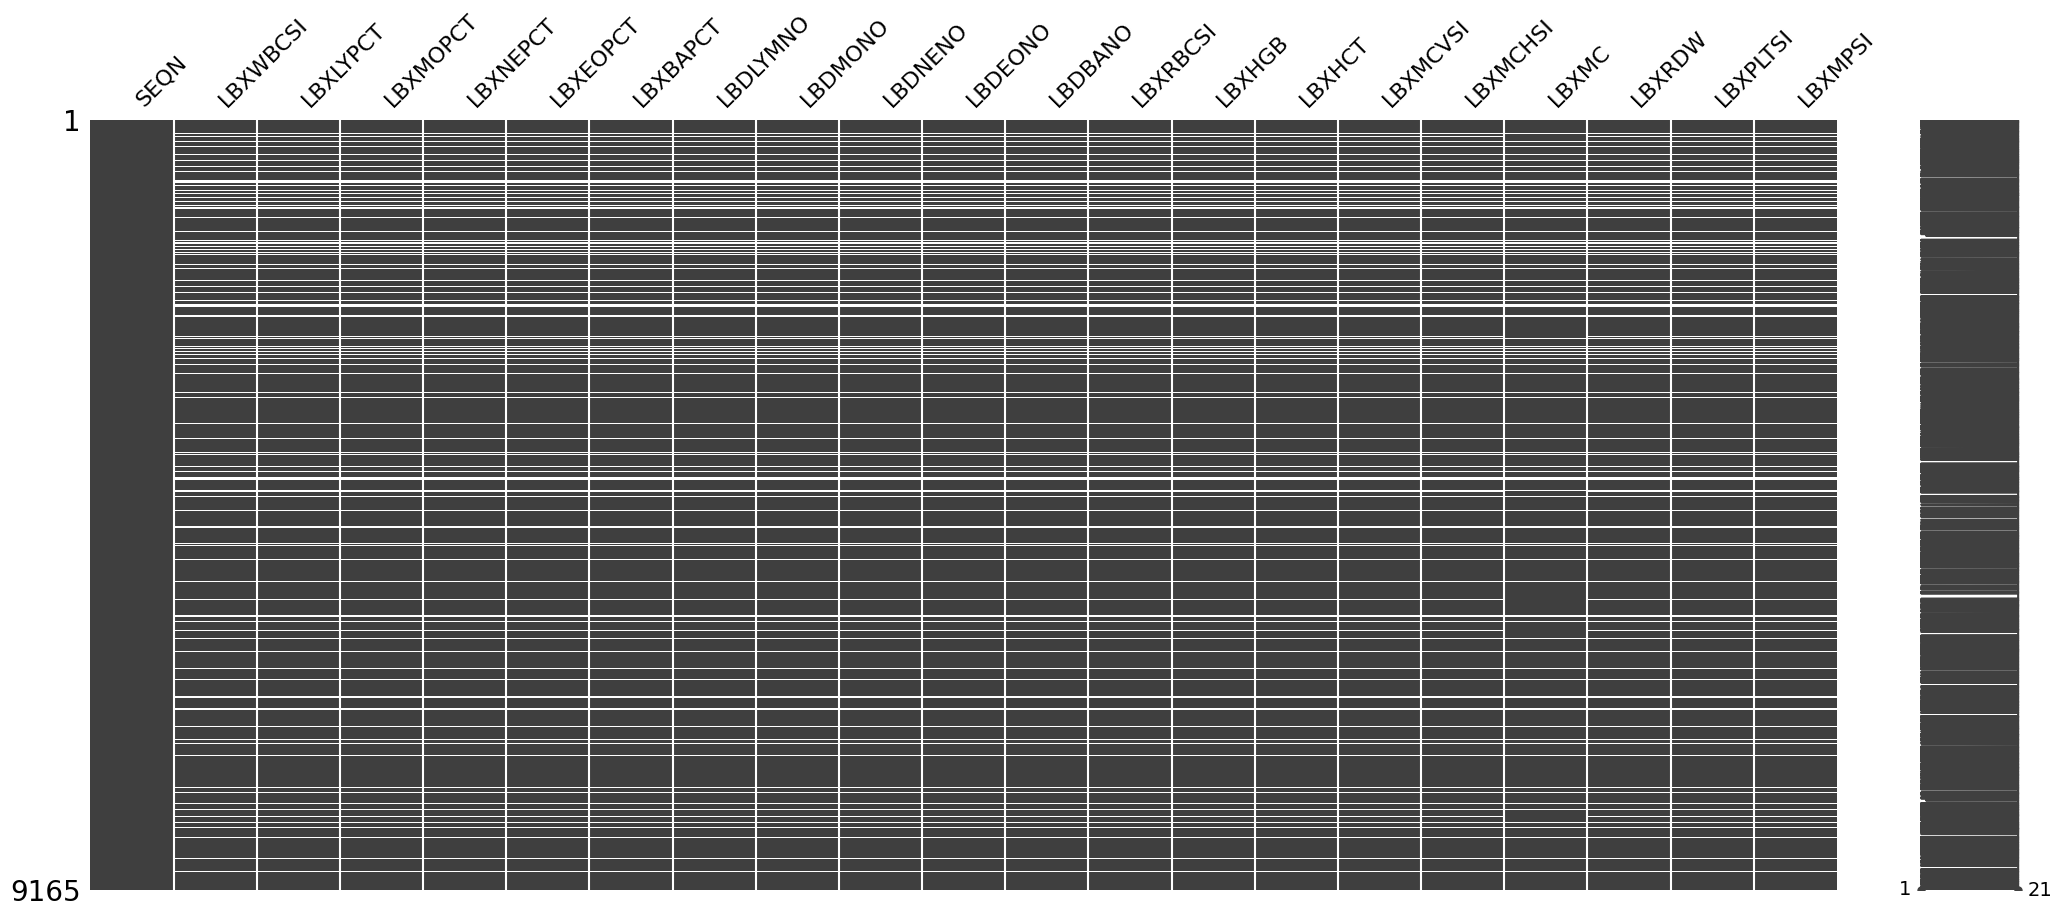

In [4]:
msno.matrix(cbc)

Missing values are not at random. Each sample falls into one of these categories:
* All values listed.
* Not a single value listed.
* Missing the concentration values of white cells subtypes.

In [5]:
cbc.loc[cbc['LBXLYPCT'].isna() & ~cbc['LBXWBCSI'].isna()]

SEQN  LBXWBCSI  LBXLYPCT  LBXMOPCT  LBXNEPCT  LBXEOPCT  LBXBAPCT  \
811  84623.0      12.2       NaN       NaN       NaN       NaN       NaN   

     LBDLYMNO  LBDMONO  LBDNENO  ...  LBDBANO  LBXRBCSI  LBXHGB  LBXHCT  \
811       NaN      NaN      NaN  ...      NaN      4.23    12.4    36.9   

     LBXMCVSI  LBXMCHSI  LBXMC  LBXRDW  LBXPLTSI  LBXMPSI  
811      87.3      29.4   33.6    15.5     261.0      9.8  

[1 rows x 21 columns]

Reasons why the values are missing seems to be related to the sampling practice: either not providing biospecimens, not enough volume or values below the lower limit of detection.

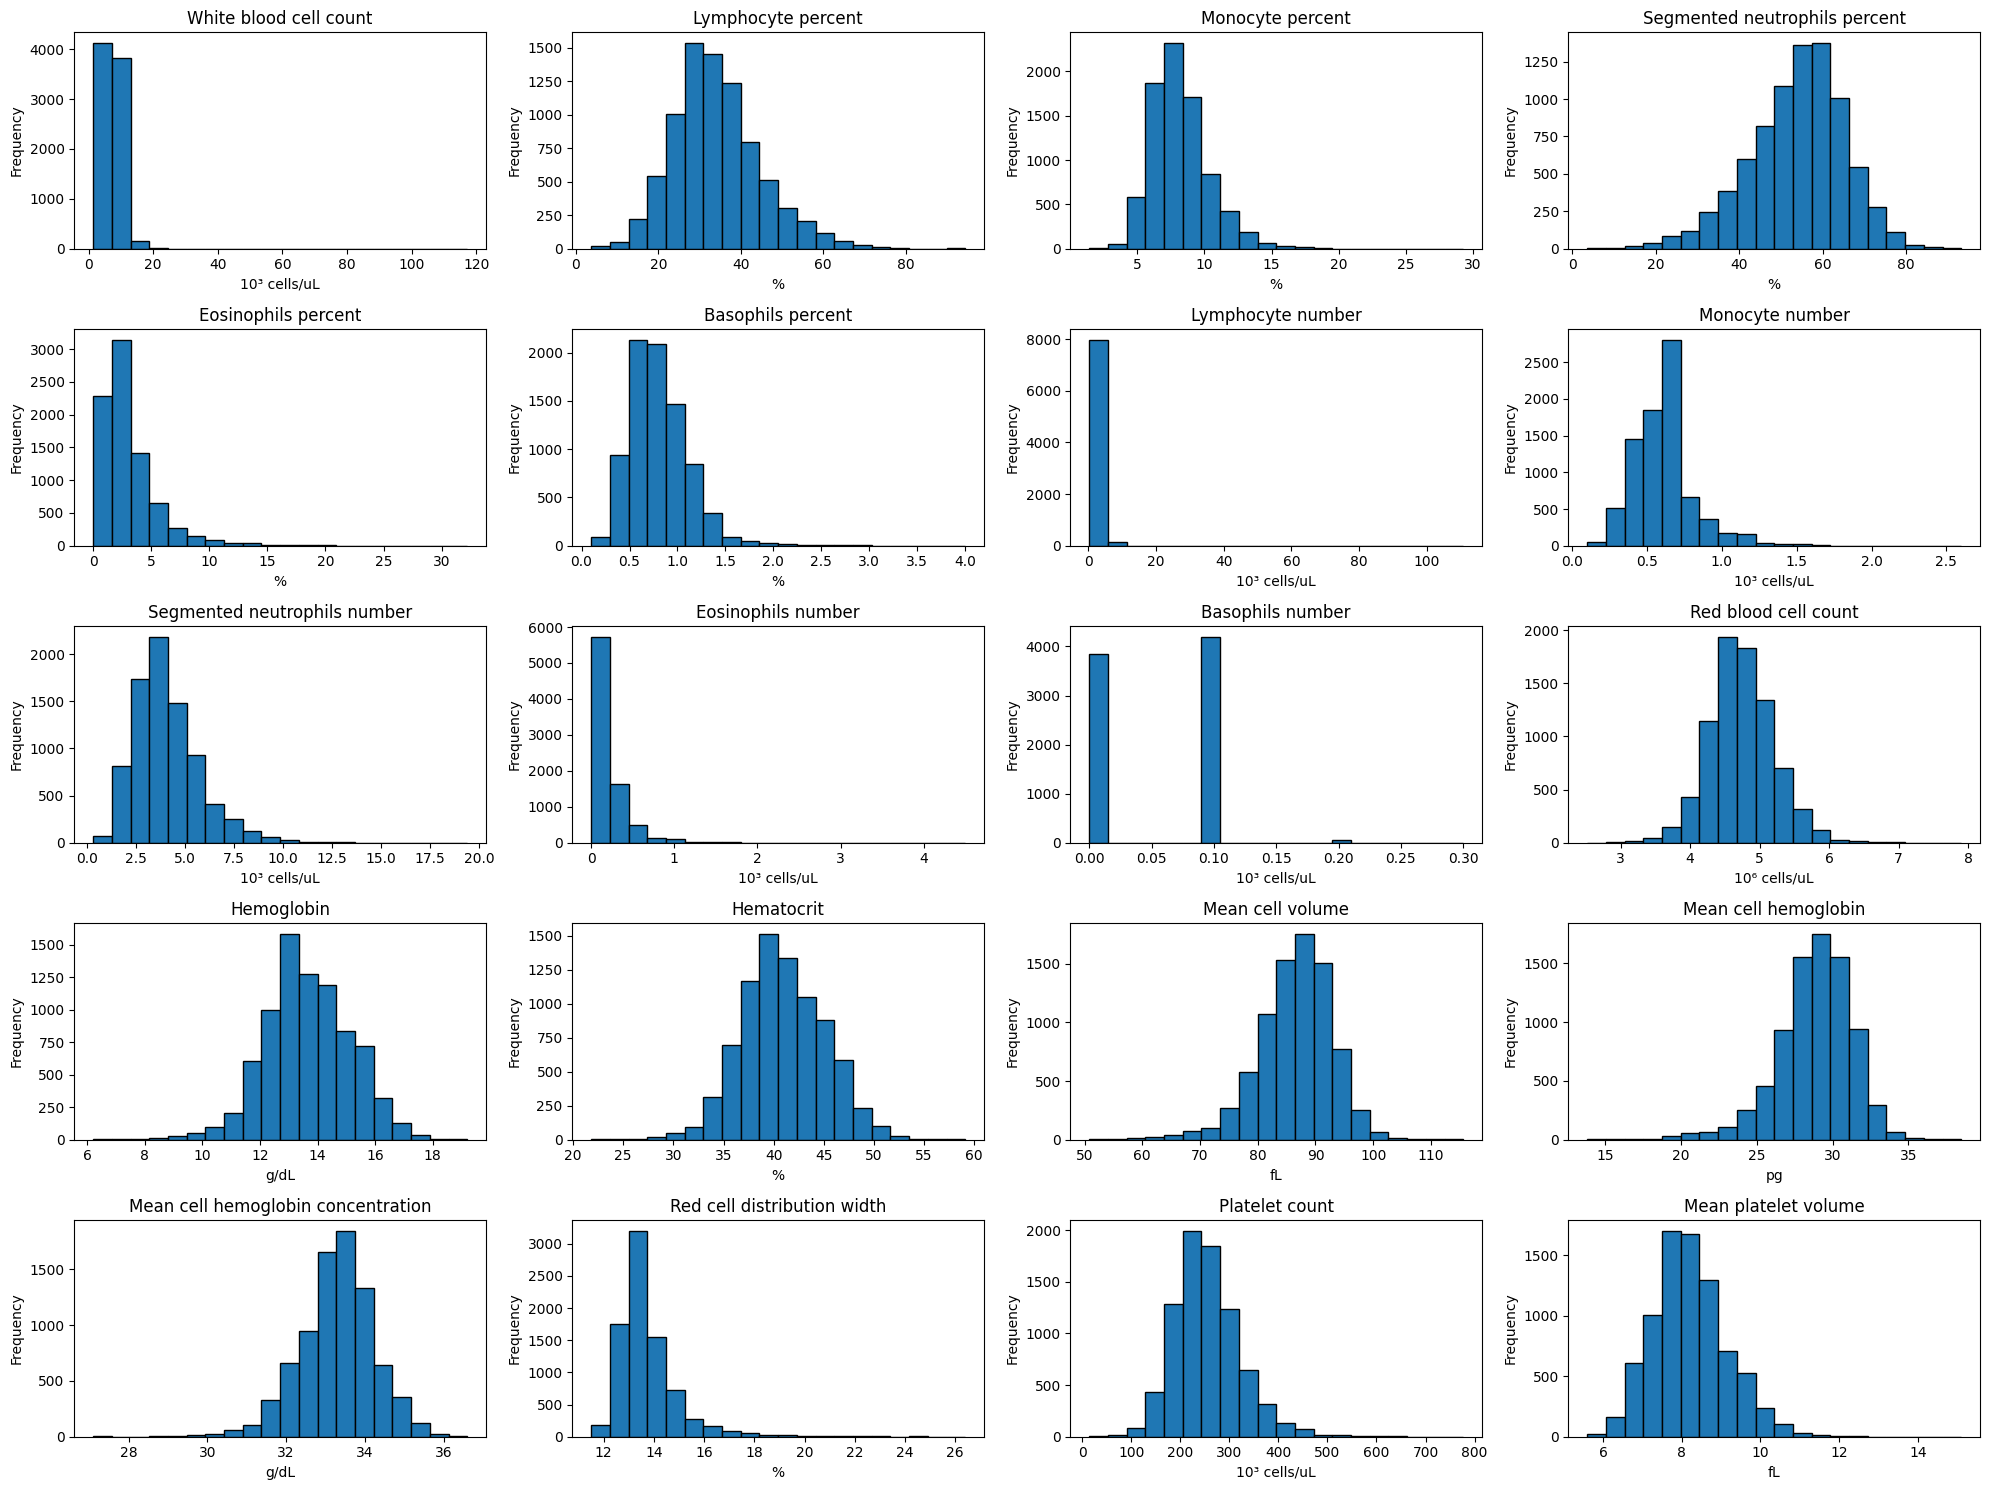

In [6]:
fig, axes = plt.subplots(5,4,figsize=(20,15))
axes = axes.flatten()

for i, (col, (name, unit)) in enumerate(metacbc.items()):
    ax = axes[i]
    ax.hist(cbc[col].dropna(),bins=20,edgecolor='black')
    ax.set_title(name)
    ax.set_xlabel(unit)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

All values are within the lower and upper limits of detection. No apparent cases of extreme outliers.
To be determined the reference intervals from each variable.

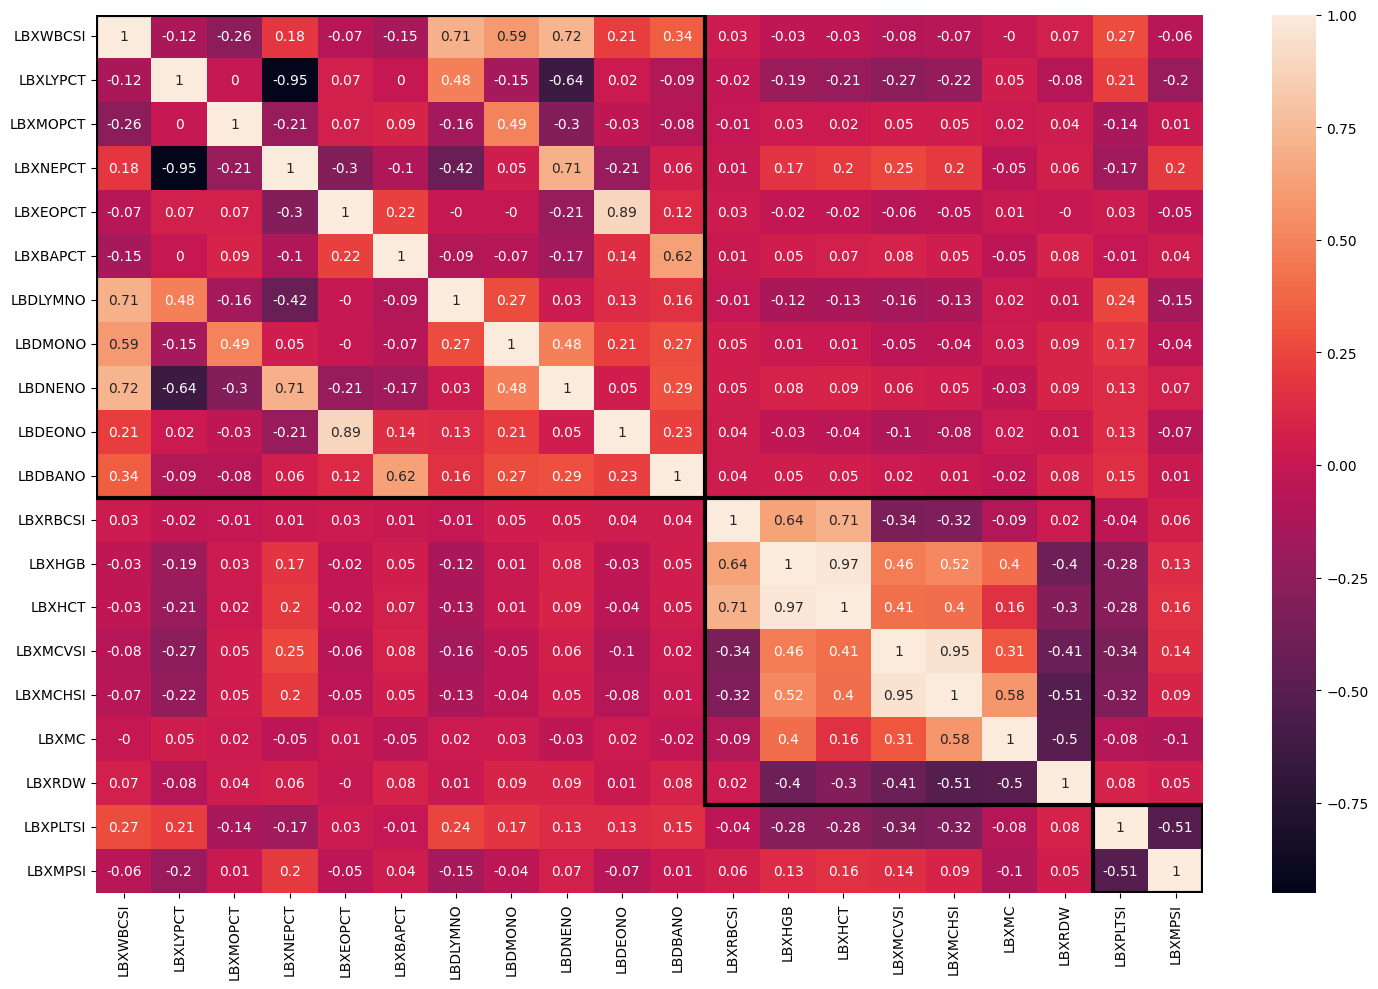

In [7]:
plt.figure(figsize=(15,10))
fig = sns.heatmap(cbc.iloc[:,1:].dropna().corr().round(2),annot=True)

whitec = Rectangle((0,0),11,11,fill=False,linewidth=3)
redc = Rectangle((11,11),7,7,fill=False,linewidth=3)
plaq = Rectangle((18,18),2,2,fill=False,linewidth=3)

for rect in [whitec,redc,plaq]:
    fig.add_patch(rect)

plt.tight_layout()
plt.show()

The three squares of interaction follow regular hematology behavior in literature:
1. White cells (upper square): white cells and subtypes.
2. Red cells (middle square): red cells and hemoglobin.
3. Plalelets (lower square): as is.

Depending on reference intervals and common use in medical literature, some variable may be dropped in order to reduce input dimensions.

---

# Standard Biochemistry Profile (BIOPRO)
* Category: Biochemistry profile.
* Range: 2015-2016
* Link: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2015/DataFiles/BIOPRO_I.htm

Based on the Beckman Coulter methodology of counting and sizing (Beckman Coulter DxH).

In [8]:
biopro = pd.read_sas('BIOPRO_I.xpt')
biopro.describe()

SEQN       LBXSAL     LBDSALSI     LBXSAPSI     LBXSASSI  \
count   6744.000000  6256.000000  6256.000000  6255.000000  6256.000000   
mean   88713.767200     4.343254    43.432545    81.288409    25.539162   
std     2885.497074     0.354209     3.542085    50.900418    15.783925   
min    83732.000000     2.000000    20.000000    23.000000     8.000000   
25%    86191.750000     4.100000    41.000000    56.000000    20.000000   
50%    88724.500000     4.400000    44.000000    69.000000    23.000000   
75%    91217.250000     4.600000    46.000000    87.000000    28.000000   
max    93702.000000     5.600000    56.000000   740.000000   832.000000   

          LBXSATSI       LBXSBU     LBDSBUSI     LBXSC3SI       LBXSCA  ...  \
count  6256.000000  6255.000000  6255.000000  6257.000000  6257.000000  ...   
mean     24.312660    14.217266     5.075922    24.410101     9.375180  ...   
std      16.875471     5.711620     2.039121     2.176429     0.348722  ...   
min       6.000000     3.000000     1.070000    15.000000     7.300000  ...   
25%      15.000000    11.000000     3.930000    23.000000     9.100000  ...   
50%      20.000000    13.000000     4.640000    24.000000     9.400000  ...   
75%      27.000000    17.000000     6.070000    26.000000     9.600000  ...   
max     319.000000    96.000000    34.270000    34.000000    11.500000  ...   

            LBXSPH     LBDSPHSI        LBXSTB      LBDSTBSI       LBXSTP  \
count  6256.000000  6256.000000  6.254000e+03  6.254000e+03  6253.000000   
mean      3.795988     1.225717  5.517957e-01  9.435712e+00     7.200560   
std       0.617963     0.199544  2.965998e-01  5.071847e+00     0.459103   
min       1.000000     0.323000  5.397605e-79  5.397605e-79     5.200000   
25%       3.400000     1.098000  4.000000e-01  6.840000e+00     6.900000   
50%       3.800000     1.227000  5.000000e-01  8.550000e+00     7.200000   
75%       4.200000     1.356000  7.000000e-01  1.197000e+01     7.500000   
max       9.700000     3.132000  3.500000e+00  5.985000e+01    10.100000   

          LBDSTPSI       LBXSTR     LBDSTRSI       LBXSUA     LBDSUASI  
count  6253.000000  6254.000000  6254.000000  6254.000000  6254.000000  
mean     72.005597   147.041573     1.660106     5.335225   317.339655  
std       4.591029   125.566634     1.417647     1.418508    84.372772  
min      52.000000    13.000000     0.147000     1.600000    95.200000  
25%      69.000000    74.000000     0.835000     4.300000   255.800000  
50%      72.000000   113.000000     1.276000     5.200000   309.300000  
75%      75.000000   180.000000     2.032000     6.200000   368.800000  
max     101.000000  3061.000000    34.559000    18.000000  1070.600000  

[8 rows x 38 columns]

<Axes: >

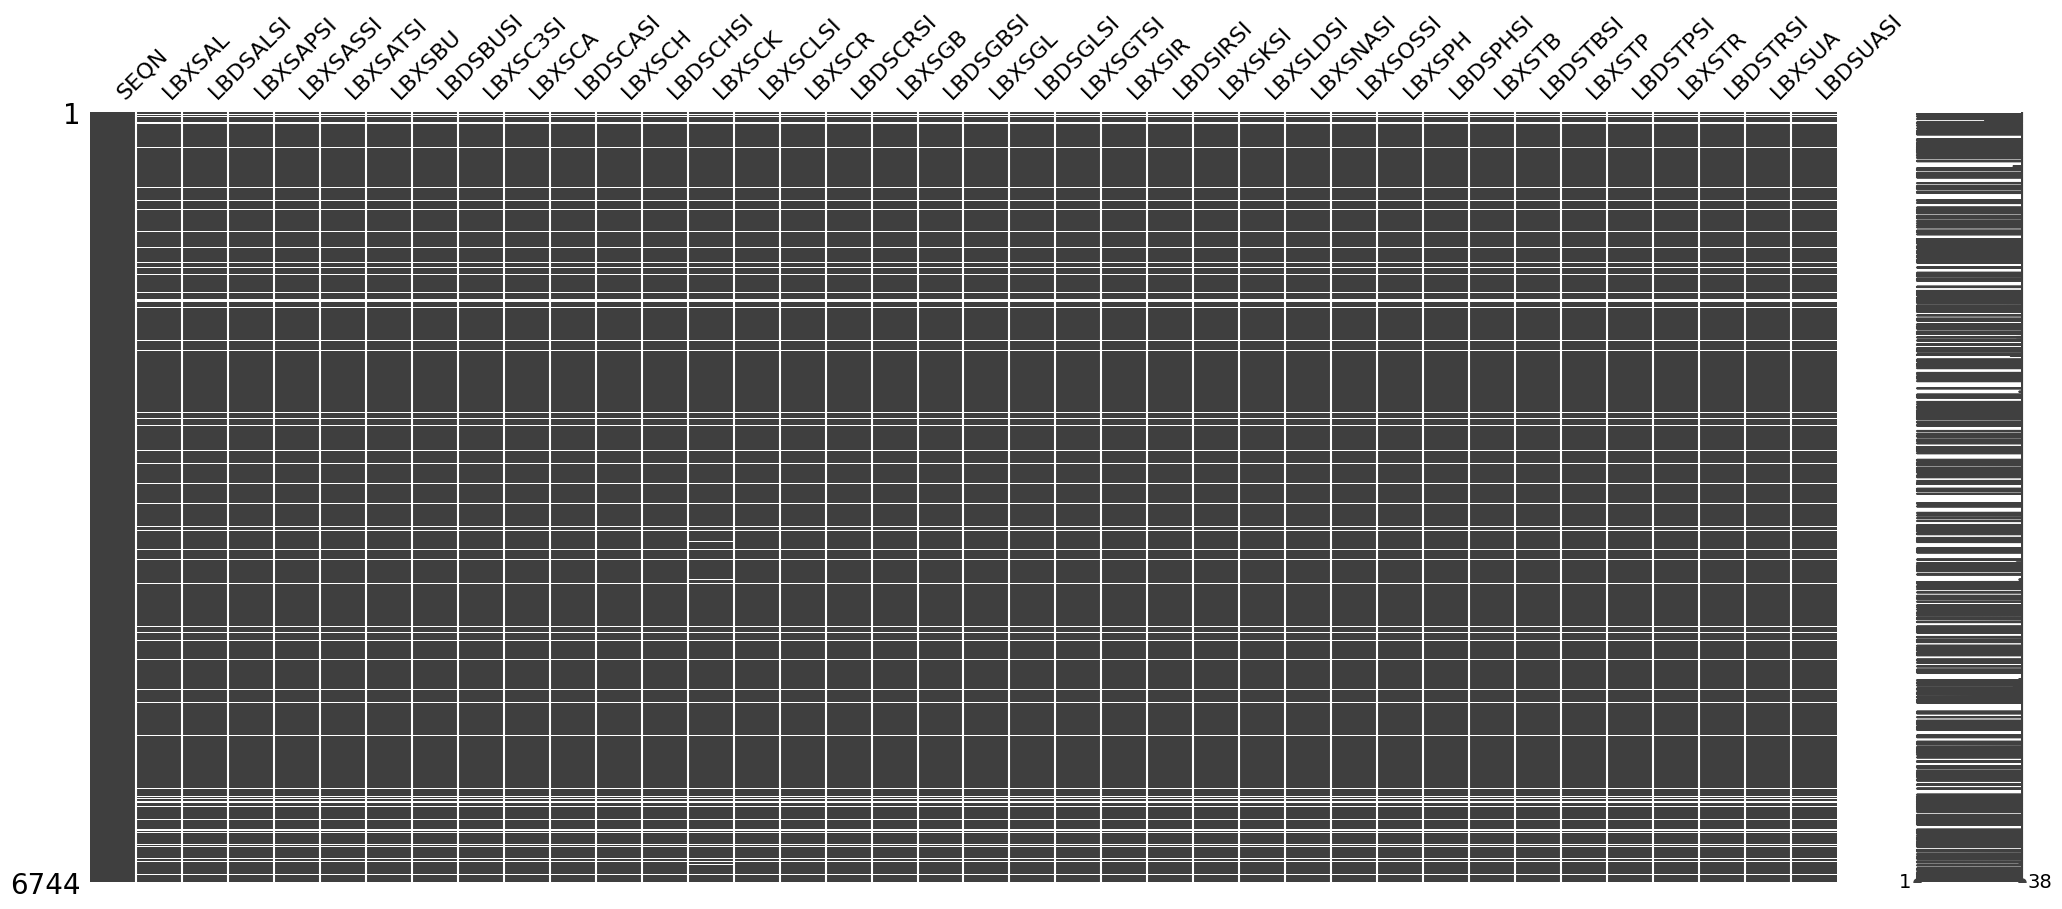

In [9]:
msno.matrix(biopro)

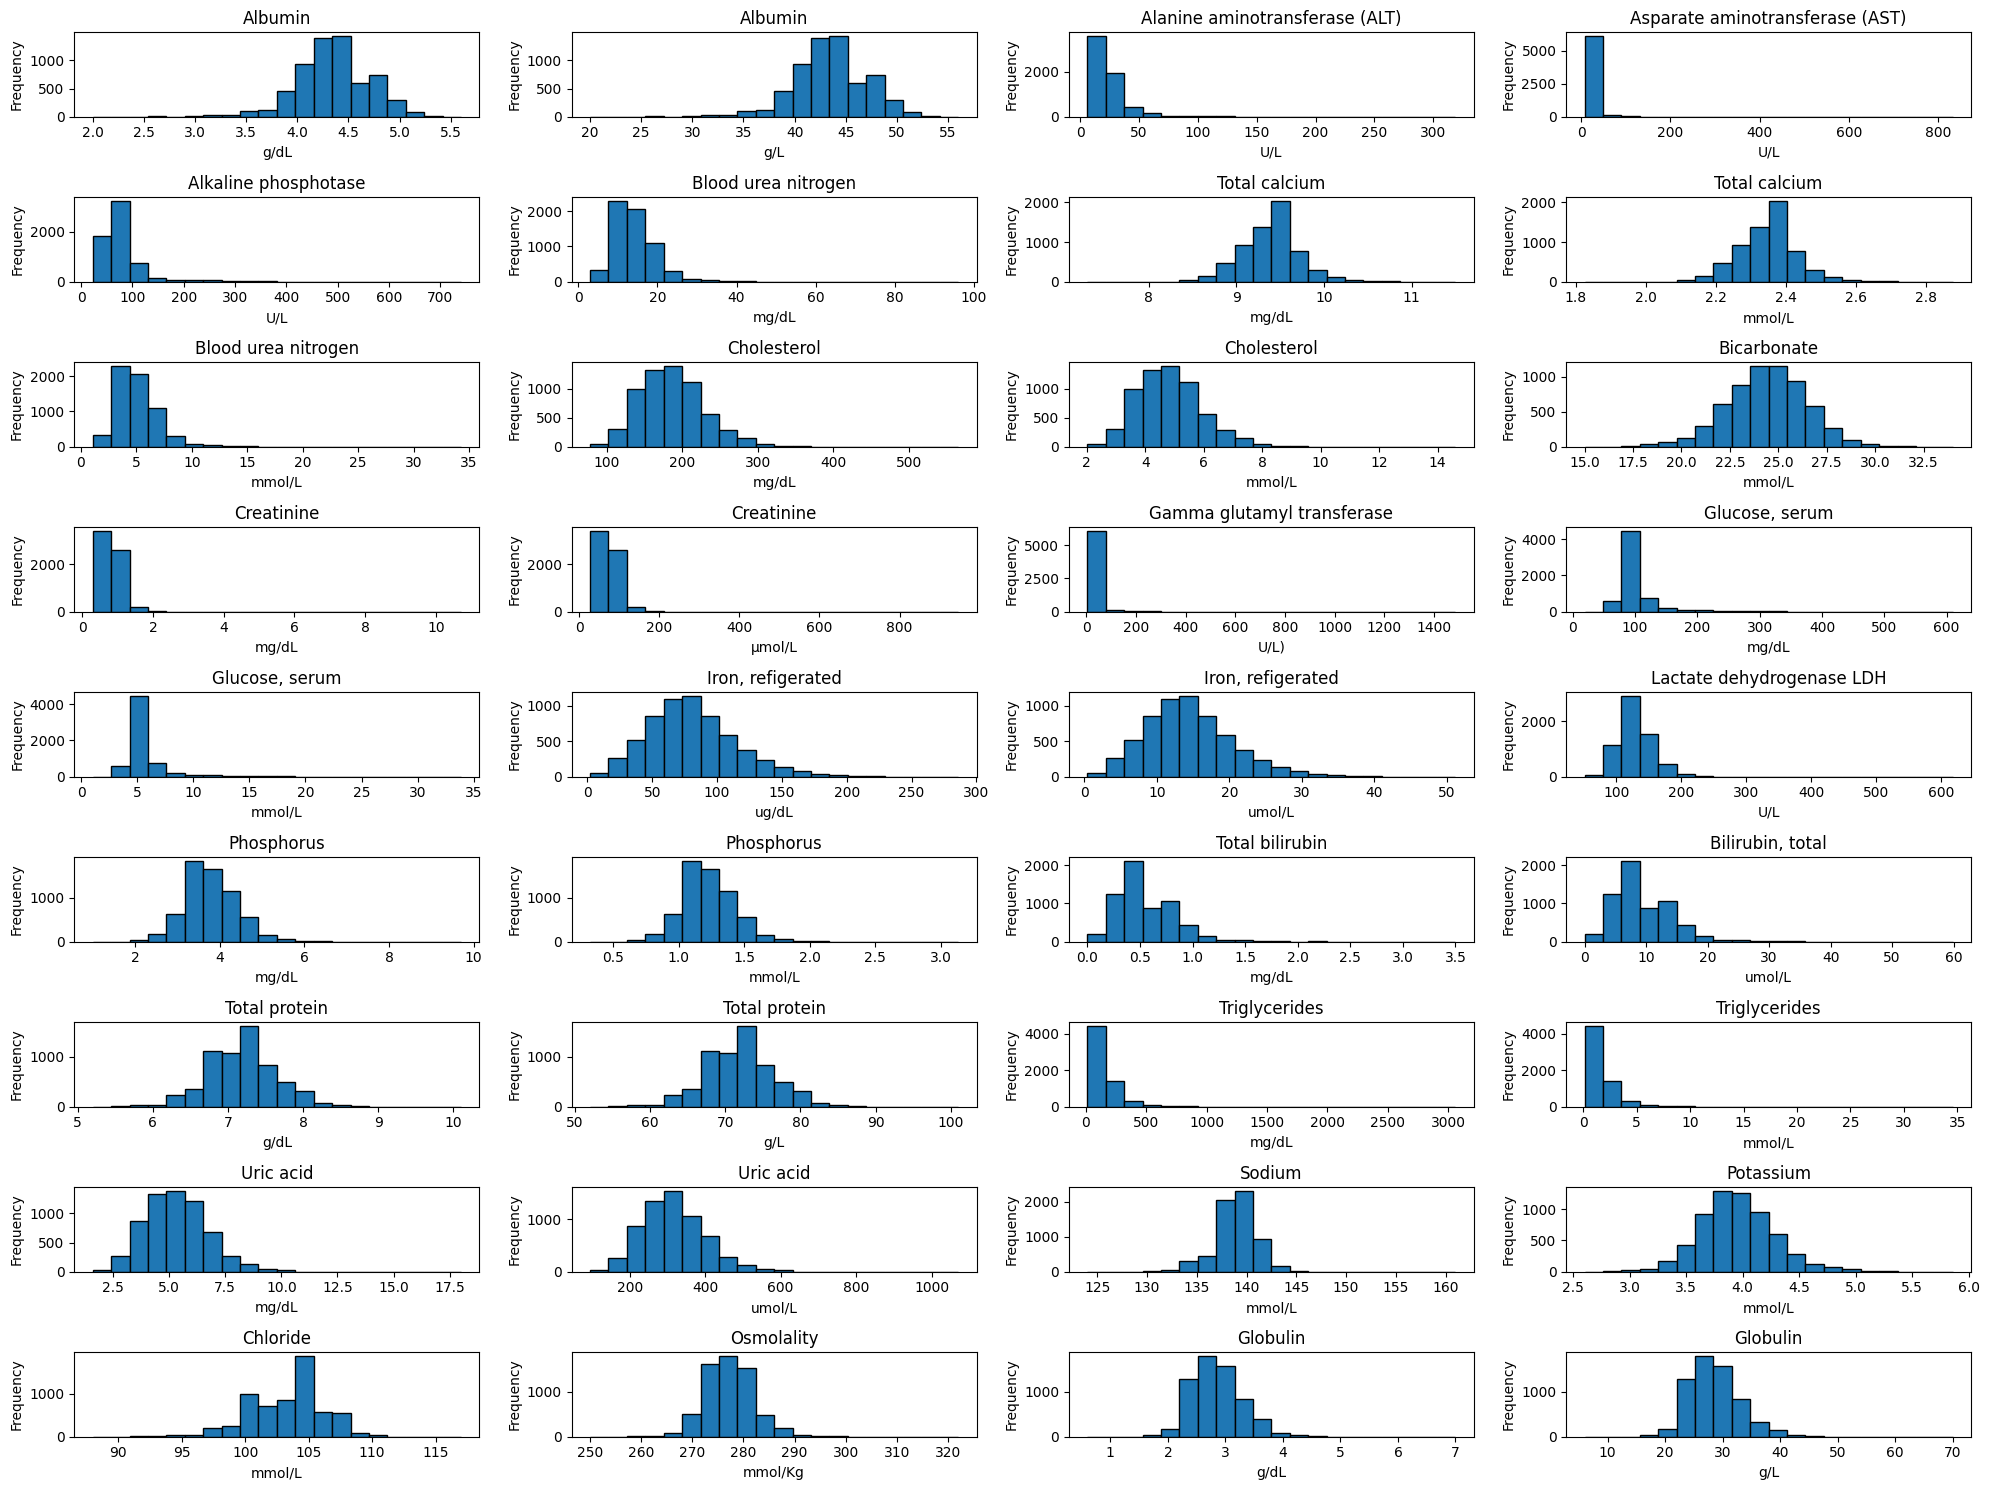

In [10]:
fig, axes = plt.subplots(9,4,figsize=(20,15))
axes = axes.flatten()

for i, (col, (name, unit)) in enumerate(metabio.items()):
    ax = axes[i]
    ax.hist(biopro[col].dropna(),bins=20,edgecolor='black')
    ax.set_title(name)
    ax.set_xlabel(unit)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()